In [201]:
import knn_model
import neural_network_model
import decision_tree_model
import naive_bayes_model
import random_forest_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from tabulate import tabulate

In [202]:
# Load the preprocessed dataset
new_df = pd.read_csv("Data/sorted_correlation_with_values.csv")
clipped_df = pd.read_csv("Data/sorted_correlation_with_values_clipped.csv")

# Separate the features (X) and the target variable (y)
X = new_df.drop("Bankrupt?", axis=1).values
y = new_df["Bankrupt?"].values
X_c = clipped_df.drop("Bankrupt?", axis=1).values
y_c = clipped_df["Bankrupt?"].values

# X: features, y: labels for up-sampling
X_resampled_up, y_resampled_up = SMOTE().fit_resample(X, y)
X_c_resampled_up, y_c_resampled_up = SMOTE().fit_resample(X_c, y_c)

# X: features, y: labels for down-sampling
rus = RandomUnderSampler(random_state=42)
X_resampled_down, y_resampled_down = rus.fit_resample(X, y)
X_c_resampled_down, y_c_resampled_down = rus.fit_resample(X_c, y_c)

# Split the data into training and test sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_resampled_up, y_resampled_up, test_size=0.2, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_resampled_down, y_resampled_down, test_size=0.2, random_state=42)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_c_resampled_up, y_c_resampled_up, test_size=0.2, random_state=42)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_c_resampled_down, y_c_resampled_down, test_size=0.2, random_state=42)

In [203]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'RMSE'])

def evaluate_model(model_name, model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    confusion_mat = confusion_matrix(y_test, predictions)
    probabilities = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probabilities)
    roc_auc = auc(fpr, tpr)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)

    table_data = [
        ["Accuracy", accuracy],
        ["Precision", precision],
        ["Recall", recall],
        ["F1 score", f1],
        ["RMSE", rmse],
        ["AUC", roc_auc]
    ]

    # Append the results to the DataFrame
    results_df.loc[len(results_df)] = [model_name, accuracy, precision, recall, f1, roc_auc, rmse]

    table = tabulate(table_data, headers=["Metric", "Value"], tablefmt="fancy_grid")

    print(f"{model_name} Model:")
    print(table)
    print("Confusion Matrix:")
    print(confusion_mat)
    print()

    # Plot ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.4f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - {}'.format(model_name))
    plt.legend(loc="lower right")
    plt.show()

In [204]:
# Train the KNN model
knn_model_1 = knn_model.train_knn_model(X_train_1, y_train_1)
knn_model_2 = knn_model.train_knn_model(X_train_2, y_train_2)
knn_model_3 = knn_model.train_knn_model(X_train_3, y_train_3)
knn_model_4 = knn_model.train_knn_model(X_train_4, y_train_4)
knn_model_5 = knn_model.train_knn_model(X_train_5, y_train_5)

# Train the neural network model
nn_model_1 = neural_network_model.train_neural_network_model(X_train_1, y_train_1)
nn_model_2 = neural_network_model.train_neural_network_model(X_train_2, y_train_2)
nn_model_3 = neural_network_model.train_neural_network_model(X_train_3, y_train_3)
nn_model_4 = neural_network_model.train_neural_network_model(X_train_4, y_train_4)
nn_model_5 = neural_network_model.train_neural_network_model(X_train_5, y_train_5)

# Train the decision tree model
dt_model_1 = decision_tree_model.train_decision_tree_model(X_train_1, y_train_1)
dt_model_2 = decision_tree_model.train_decision_tree_model(X_train_2, y_train_2)
dt_model_3 = decision_tree_model.train_decision_tree_model(X_train_3, y_train_3)
dt_model_4 = decision_tree_model.train_decision_tree_model(X_train_4, y_train_4)
dt_model_5 = decision_tree_model.train_decision_tree_model(X_train_5, y_train_5)


# Train the Naive Bayes model
nb_model_1 = naive_bayes_model.train_naive_bayes_model(X_train_1, y_train_1)
nb_model_2 = naive_bayes_model.train_naive_bayes_model(X_train_2, y_train_2)
nb_model_3 = naive_bayes_model.train_naive_bayes_model(X_train_3, y_train_3)
nb_model_4 = naive_bayes_model.train_naive_bayes_model(X_train_4, y_train_4)
nb_model_5 = naive_bayes_model.train_naive_bayes_model(X_train_5, y_train_5)

# # Train the random forest model
nf_model_1 = random_forest_model.train_random_forest_model(X_train_1, y_train_1)
nf_model_2 = random_forest_model.train_random_forest_model(X_train_2, y_train_2)
nf_model_3 = random_forest_model.train_random_forest_model(X_train_3, y_train_3)
nf_model_4 = random_forest_model.train_random_forest_model(X_train_4, y_train_4)
nf_model_5 = random_forest_model.train_random_forest_model(X_train_5, y_train_5)


KNN: Simple Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.965543 │
├───────────┼──────────┤
│ Precision │ 0.7      │
├───────────┼──────────┤
│ Recall    │ 0.137255 │
├───────────┼──────────┤
│ F1 score  │ 0.229508 │
├───────────┼──────────┤
│ RMSE      │ 0.185627 │
├───────────┼──────────┤
│ AUC       │ 0.654234 │
╘═══════════╧══════════╛
Confusion Matrix:
[[1310    3]
 [  44    7]]



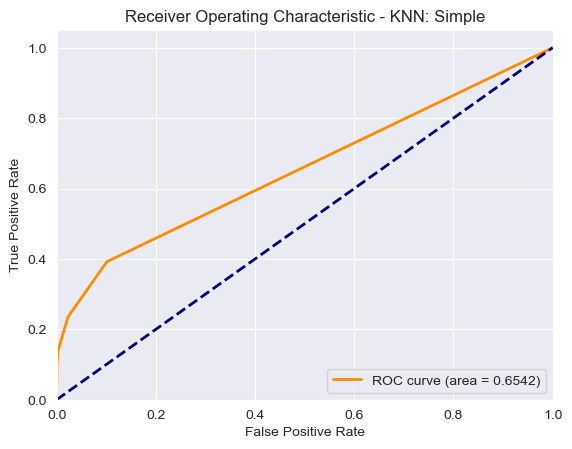

KNN: With up-sampling (SMOTE) Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.772727 │
├───────────┼──────────┤
│ Precision │ 0.803787 │
├───────────┼──────────┤
│ Recall    │ 0.715161 │
├───────────┼──────────┤
│ F1 score  │ 0.756888 │
├───────────┼──────────┤
│ RMSE      │ 0.476731 │
├───────────┼──────────┤
│ AUC       │ 0.836127 │
╘═══════════╧══════════╛
Confusion Matrix:
[[1106  228]
 [ 372  934]]



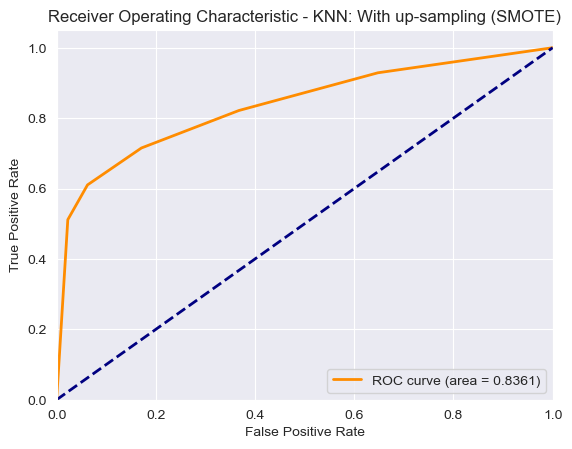

KNN: With down-sampling Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.477273 │
├───────────┼──────────┤
│ Precision │ 0.390244 │
├───────────┼──────────┤
│ Recall    │ 0.432432 │
├───────────┼──────────┤
│ F1 score  │ 0.410256 │
├───────────┼──────────┤
│ RMSE      │ 0.722999 │
├───────────┼──────────┤
│ AUC       │ 0.474298 │
╘═══════════╧══════════╛
Confusion Matrix:
[[26 25]
 [21 16]]



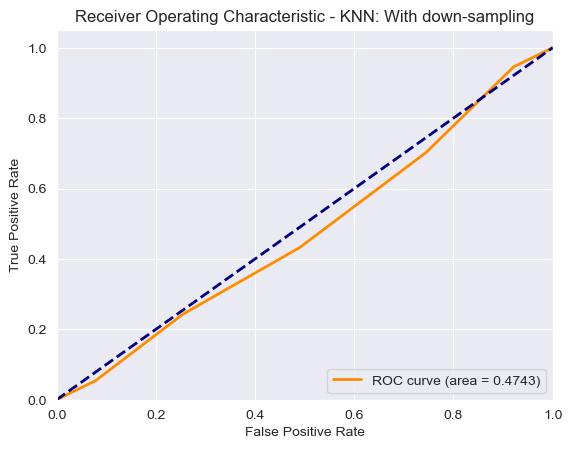

KNN: With up-sampling (SMOTE), after data clipping Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.775758 │
├───────────┼──────────┤
│ Precision │ 0.78022  │
├───────────┼──────────┤
│ Recall    │ 0.761103 │
├───────────┼──────────┤
│ F1 score  │ 0.770543 │
├───────────┼──────────┤
│ RMSE      │ 0.473542 │
├───────────┼──────────┤
│ AUC       │ 0.838468 │
╘═══════════╧══════════╛
Confusion Matrix:
[[1054  280]
 [ 312  994]]



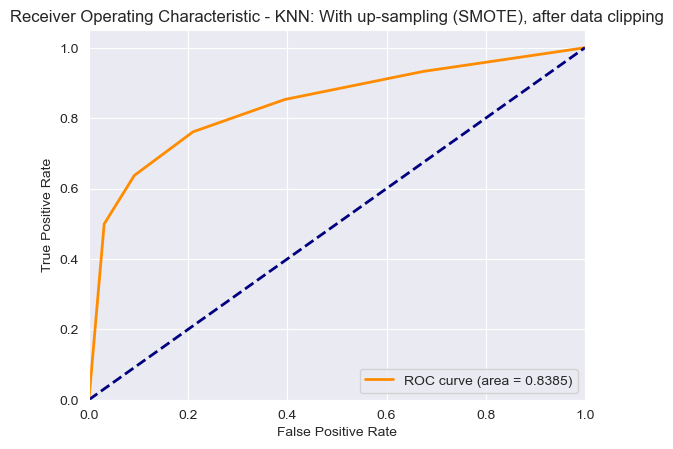

KNN: With down-sampling, after data clipping Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.477273 │
├───────────┼──────────┤
│ Precision │ 0.390244 │
├───────────┼──────────┤
│ Recall    │ 0.432432 │
├───────────┼──────────┤
│ F1 score  │ 0.410256 │
├───────────┼──────────┤
│ RMSE      │ 0.722999 │
├───────────┼──────────┤
│ AUC       │ 0.474298 │
╘═══════════╧══════════╛
Confusion Matrix:
[[26 25]
 [21 16]]



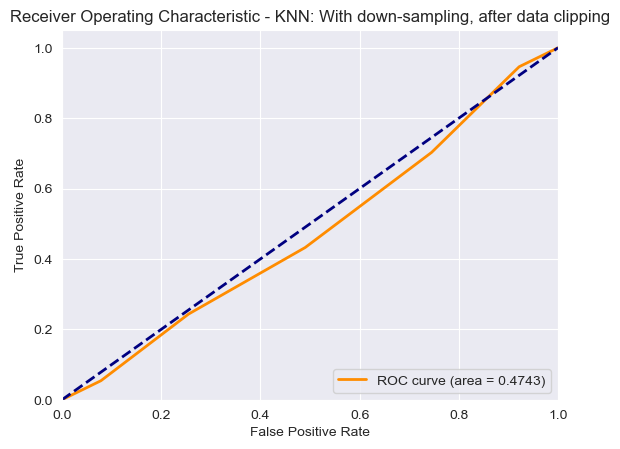

Neural Network: Simple Model:
╒═══════════╤═══════════╕
│ Metric    │     Value │
╞═══════════╪═══════════╡
│ Accuracy  │ 0.96261   │
├───────────┼───────────┤
│ Precision │ 0.5       │
├───────────┼───────────┤
│ Recall    │ 0.0588235 │
├───────────┼───────────┤
│ F1 score  │ 0.105263  │
├───────────┼───────────┤
│ RMSE      │ 0.193365  │
├───────────┼───────────┤
│ AUC       │ 0.452197  │
╘═══════════╧═══════════╛
Confusion Matrix:
[[1310    3]
 [  48    3]]



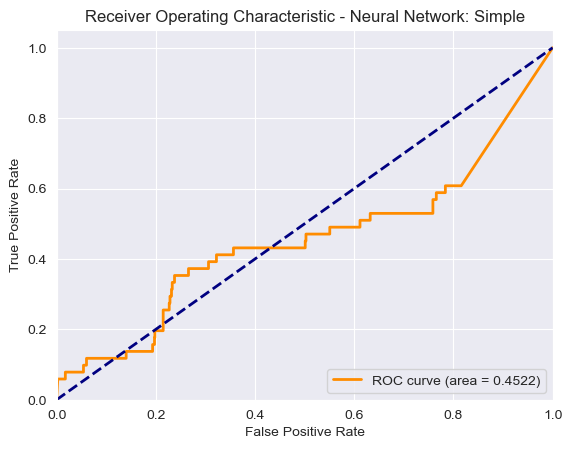

Neural Network: With up-sampling (SMOTE) Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.685985 │
├───────────┼──────────┤
│ Precision │ 0.620515 │
├───────────┼──────────┤
│ Recall    │ 0.940276 │
├───────────┼──────────┤
│ F1 score  │ 0.747641 │
├───────────┼──────────┤
│ RMSE      │ 0.560371 │
├───────────┼──────────┤
│ AUC       │ 0.785511 │
╘═══════════╧══════════╛
Confusion Matrix:
[[ 583  751]
 [  78 1228]]



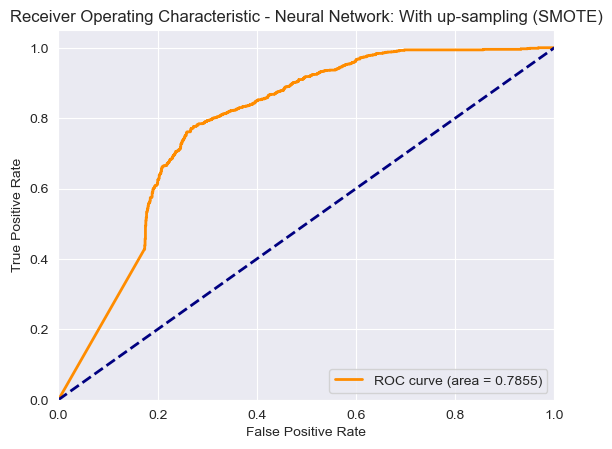

Neural Network: With down-sampling Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.625    │
├───────────┼──────────┤
│ Precision │ 0.571429 │
├───────────┼──────────┤
│ Recall    │ 0.432432 │
├───────────┼──────────┤
│ F1 score  │ 0.492308 │
├───────────┼──────────┤
│ RMSE      │ 0.612372 │
├───────────┼──────────┤
│ AUC       │ 0.629041 │
╘═══════════╧══════════╛
Confusion Matrix:
[[39 12]
 [21 16]]



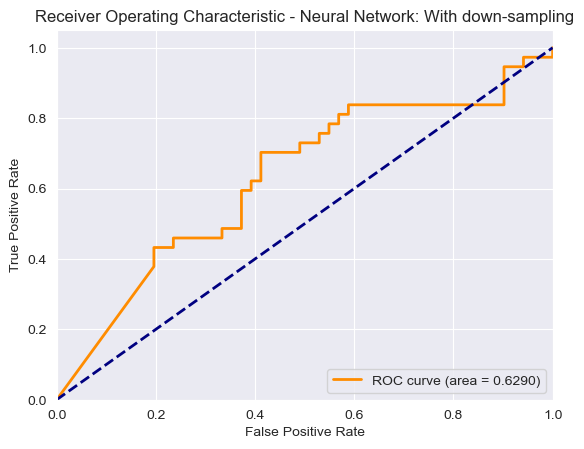

Neural Network: With up-sampling (SMOTE), after data clipping Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.65303  │
├───────────┼──────────┤
│ Precision │ 0.691176 │
├───────────┼──────────┤
│ Recall    │ 0.539816 │
├───────────┼──────────┤
│ F1 score  │ 0.606191 │
├───────────┼──────────┤
│ RMSE      │ 0.589041 │
├───────────┼──────────┤
│ AUC       │ 0.732413 │
╘═══════════╧══════════╛
Confusion Matrix:
[[1019  315]
 [ 601  705]]



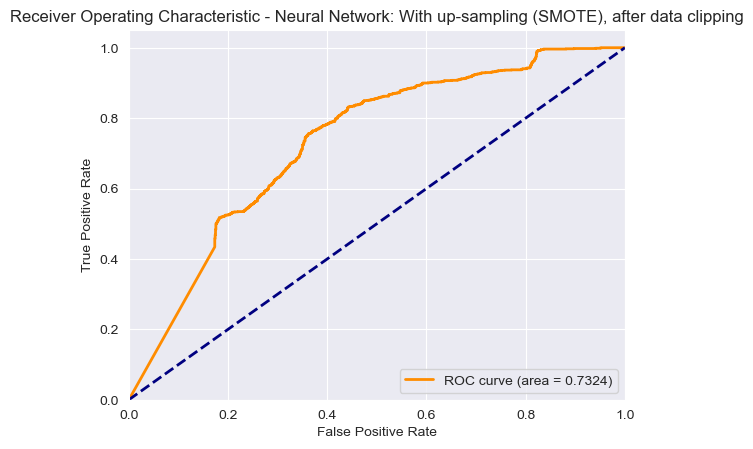

Neural Network: With down-sampling, after data clipping Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.579545 │
├───────────┼──────────┤
│ Precision │ 0.5      │
├───────────┼──────────┤
│ Recall    │ 0.432432 │
├───────────┼──────────┤
│ F1 score  │ 0.463768 │
├───────────┼──────────┤
│ RMSE      │ 0.648425 │
├───────────┼──────────┤
│ AUC       │ 0.600954 │
╘═══════════╧══════════╛
Confusion Matrix:
[[35 16]
 [21 16]]



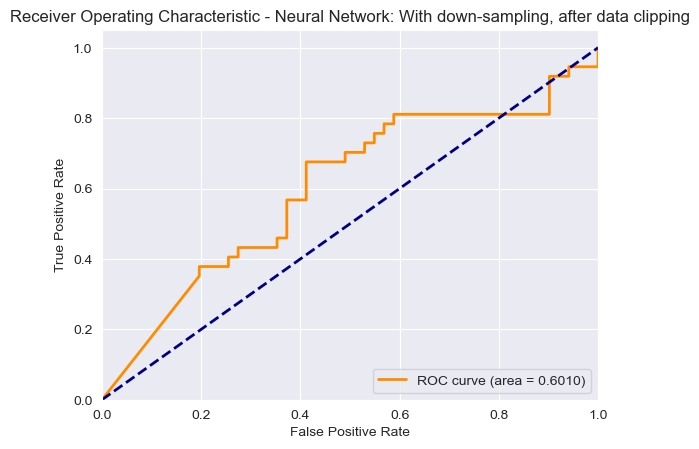

Decision Tree: Simple Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.961144 │
├───────────┼──────────┤
│ Precision │ 0.458333 │
├───────────┼──────────┤
│ Recall    │ 0.215686 │
├───────────┼──────────┤
│ F1 score  │ 0.293333 │
├───────────┼──────────┤
│ RMSE      │ 0.19712  │
├───────────┼──────────┤
│ AUC       │ 0.832773 │
╘═══════════╧══════════╛
Confusion Matrix:
[[1300   13]
 [  40   11]]



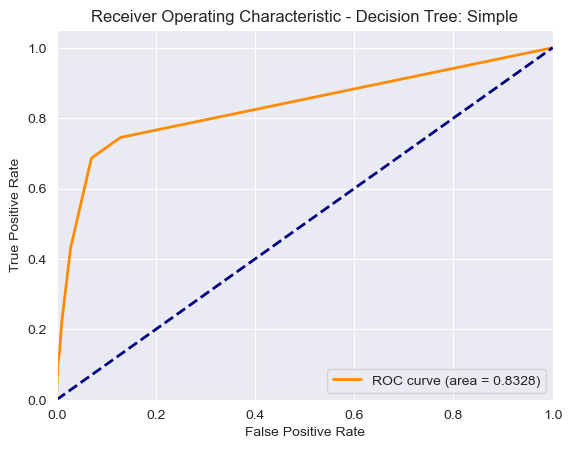

Decision Tree: With up-sampling (SMOTE) Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.923106 │
├───────────┼──────────┤
│ Precision │ 0.895341 │
├───────────┼──────────┤
│ Recall    │ 0.956355 │
├───────────┼──────────┤
│ F1 score  │ 0.924843 │
├───────────┼──────────┤
│ RMSE      │ 0.277298 │
├───────────┼──────────┤
│ AUC       │ 0.942767 │
╘═══════════╧══════════╛
Confusion Matrix:
[[1188  146]
 [  57 1249]]



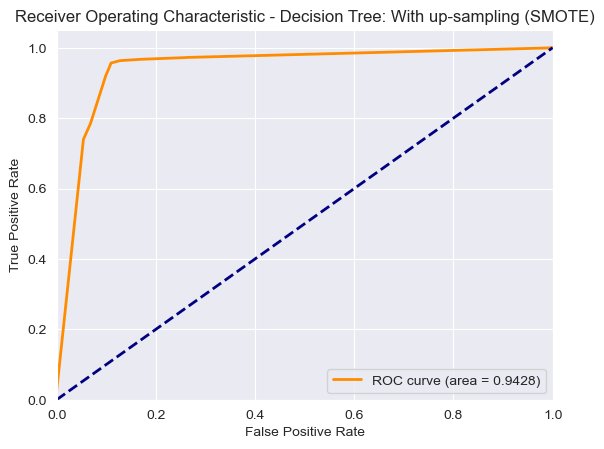

Decision Tree: With down-sampling Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.806818 │
├───────────┼──────────┤
│ Precision │ 0.75     │
├───────────┼──────────┤
│ Recall    │ 0.810811 │
├───────────┼──────────┤
│ F1 score  │ 0.779221 │
├───────────┼──────────┤
│ RMSE      │ 0.439525 │
├───────────┼──────────┤
│ AUC       │ 0.783254 │
╘═══════════╧══════════╛
Confusion Matrix:
[[41 10]
 [ 7 30]]



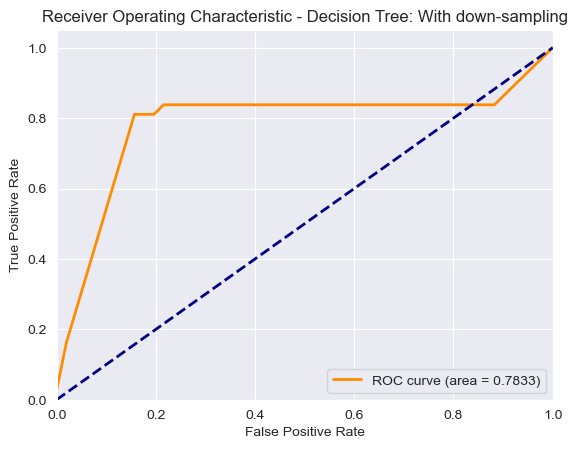

Decision Tree: With up-sampling (SMOTE), after data clipping Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.928409 │
├───────────┼──────────┤
│ Precision │ 0.906182 │
├───────────┼──────────┤
│ Recall    │ 0.954058 │
├───────────┼──────────┤
│ F1 score  │ 0.929504 │
├───────────┼──────────┤
│ RMSE      │ 0.267565 │
├───────────┼──────────┤
│ AUC       │ 0.947331 │
╘═══════════╧══════════╛
Confusion Matrix:
[[1205  129]
 [  60 1246]]



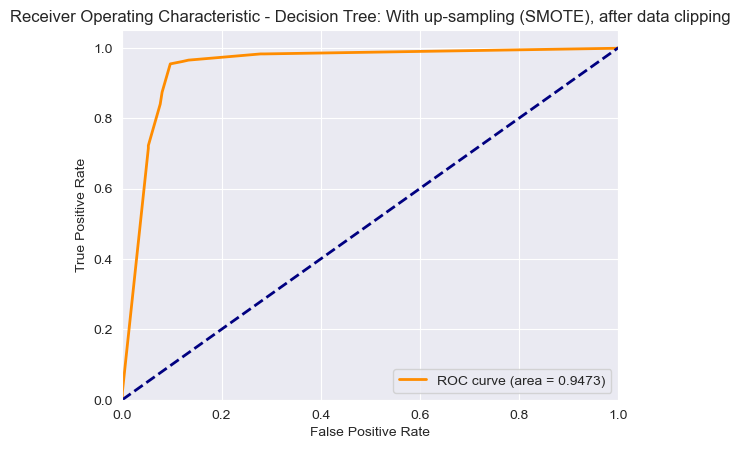

Decision Tree: With down-sampling, after data clipping Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.818182 │
├───────────┼──────────┤
│ Precision │ 0.769231 │
├───────────┼──────────┤
│ Recall    │ 0.810811 │
├───────────┼──────────┤
│ F1 score  │ 0.789474 │
├───────────┼──────────┤
│ RMSE      │ 0.426401 │
├───────────┼──────────┤
│ AUC       │ 0.793323 │
╘═══════════╧══════════╛
Confusion Matrix:
[[42  9]
 [ 7 30]]



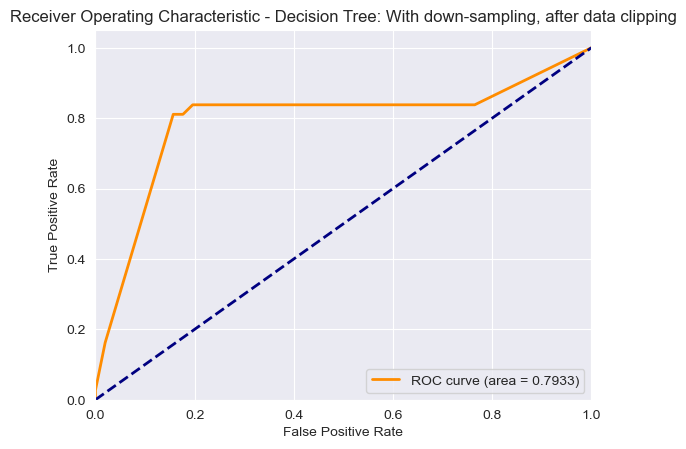

Naive Bayes: Simple Model:
╒═══════════╤═══════════╕
│ Metric    │     Value │
╞═══════════╪═══════════╡
│ Accuracy  │ 0.0366569 │
├───────────┼───────────┤
│ Precision │ 0.0366838 │
├───────────┼───────────┤
│ Recall    │ 0.980392  │
├───────────┼───────────┤
│ F1 score  │ 0.0707214 │
├───────────┼───────────┤
│ RMSE      │ 0.9815    │
├───────────┼───────────┤
│ AUC       │ 0.648418  │
╘═══════════╧═══════════╛
Confusion Matrix:
[[   0 1313]
 [   1   50]]



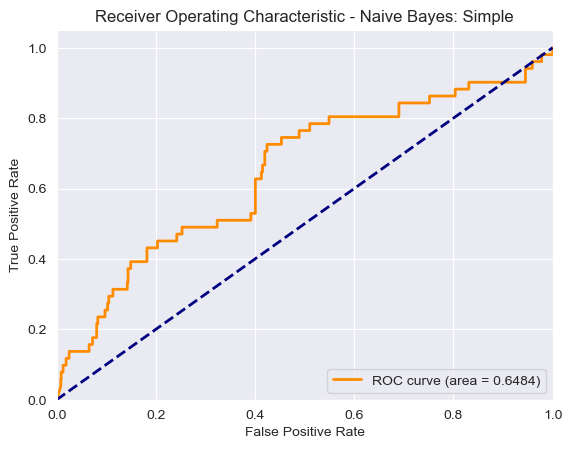

Naive Bayes: With up-sampling (SMOTE) Model:
╒═══════════╤═══════════╕
│ Metric    │     Value │
╞═══════════╪═══════════╡
│ Accuracy  │ 0.522727  │
├───────────┼───────────┤
│ Precision │ 0.859375  │
├───────────┼───────────┤
│ Recall    │ 0.0421133 │
├───────────┼───────────┤
│ F1 score  │ 0.080292  │
├───────────┼───────────┤
│ RMSE      │ 0.690849  │
├───────────┼───────────┤
│ AUC       │ 0.68592   │
╘═══════════╧═══════════╛
Confusion Matrix:
[[1325    9]
 [1251   55]]



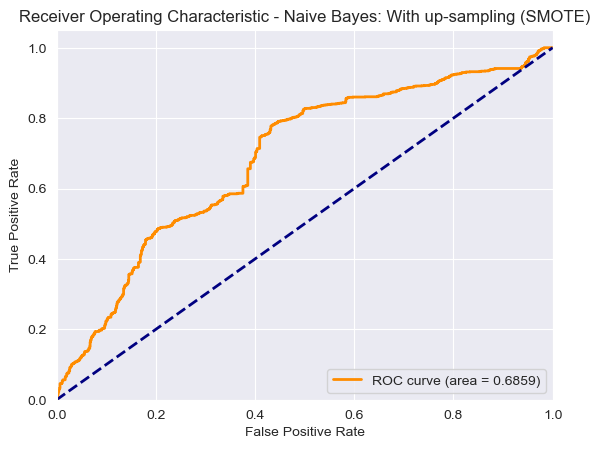

Naive Bayes: With down-sampling Model:
╒═══════════╤═══════════╕
│ Metric    │     Value │
╞═══════════╪═══════════╡
│ Accuracy  │ 0.590909  │
├───────────┼───────────┤
│ Precision │ 1         │
├───────────┼───────────┤
│ Recall    │ 0.027027  │
├───────────┼───────────┤
│ F1 score  │ 0.0526316 │
├───────────┼───────────┤
│ RMSE      │ 0.639602  │
├───────────┼───────────┤
│ AUC       │ 0.673556  │
╘═══════════╧═══════════╛
Confusion Matrix:
[[51  0]
 [36  1]]



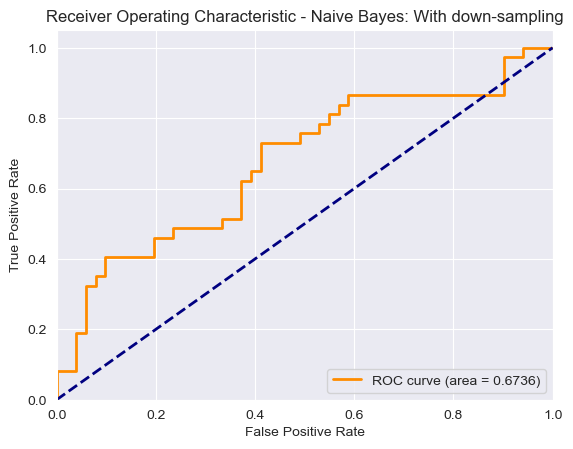

Naive Bayes: With up-sampling (SMOTE), after data clipping Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.530682 │
├───────────┼──────────┤
│ Precision │ 0.894118 │
├───────────┼──────────┤
│ Recall    │ 0.058193 │
├───────────┼──────────┤
│ F1 score  │ 0.109274 │
├───────────┼──────────┤
│ RMSE      │ 0.685068 │
├───────────┼──────────┤
│ AUC       │ 0.698111 │
╘═══════════╧══════════╛
Confusion Matrix:
[[1325    9]
 [1230   76]]



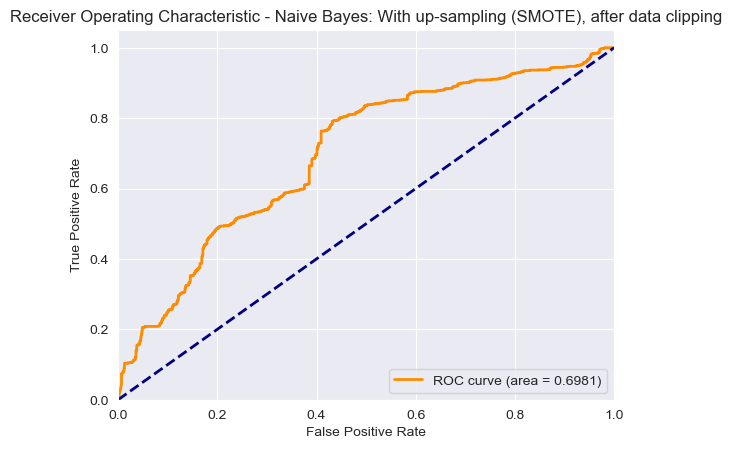

Naive Bayes: With down-sampling, after data clipping Model:
╒═══════════╤═══════════╕
│ Metric    │     Value │
╞═══════════╪═══════════╡
│ Accuracy  │ 0.602273  │
├───────────┼───────────┤
│ Precision │ 1         │
├───────────┼───────────┤
│ Recall    │ 0.0540541 │
├───────────┼───────────┤
│ F1 score  │ 0.102564  │
├───────────┼───────────┤
│ RMSE      │ 0.630656  │
├───────────┼───────────┤
│ AUC       │ 0.678855  │
╘═══════════╧═══════════╛
Confusion Matrix:
[[51  0]
 [35  2]]



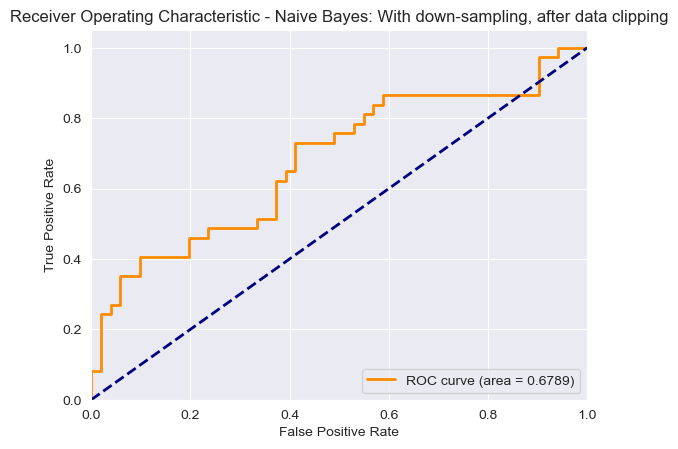

Random Forest: Simple Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.964809 │
├───────────┼──────────┤
│ Precision │ 0.6      │
├───────────┼──────────┤
│ Recall    │ 0.176471 │
├───────────┼──────────┤
│ F1 score  │ 0.272727 │
├───────────┼──────────┤
│ RMSE      │ 0.187592 │
├───────────┼──────────┤
│ AUC       │ 0.914079 │
╘═══════════╧══════════╛
Confusion Matrix:
[[1307    6]
 [  42    9]]



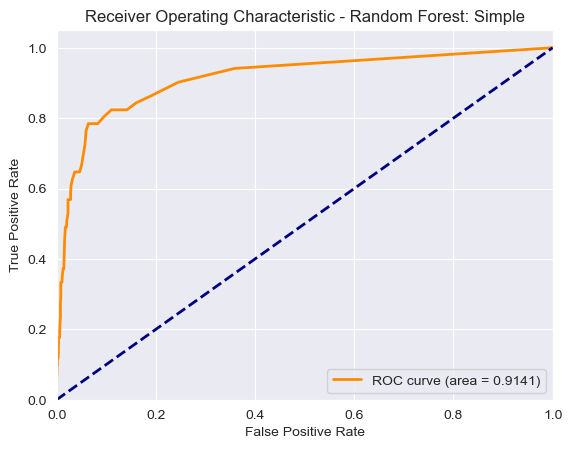

Random Forest: With up-sampling (SMOTE) Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.971212 │
├───────────┼──────────┤
│ Precision │ 0.952872 │
├───────────┼──────────┤
│ Recall    │ 0.990812 │
├───────────┼──────────┤
│ F1 score  │ 0.971471 │
├───────────┼──────────┤
│ RMSE      │ 0.16967  │
├───────────┼──────────┤
│ AUC       │ 0.997572 │
╘═══════════╧══════════╛
Confusion Matrix:
[[1270   64]
 [  12 1294]]



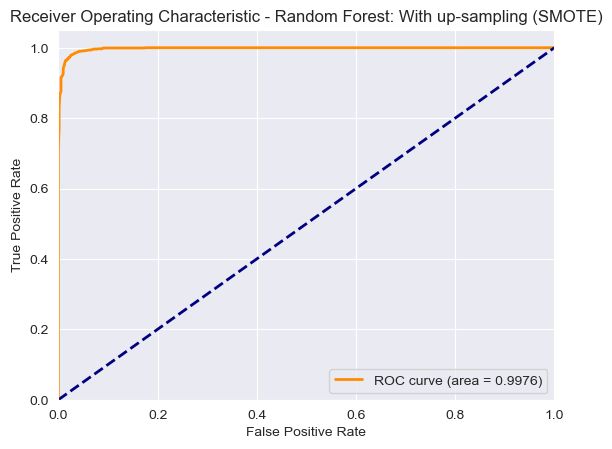

Random Forest: With down-sampling Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.840909 │
├───────────┼──────────┤
│ Precision │ 0.794872 │
├───────────┼──────────┤
│ Recall    │ 0.837838 │
├───────────┼──────────┤
│ F1 score  │ 0.815789 │
├───────────┼──────────┤
│ RMSE      │ 0.398862 │
├───────────┼──────────┤
│ AUC       │ 0.918124 │
╘═══════════╧══════════╛
Confusion Matrix:
[[43  8]
 [ 6 31]]



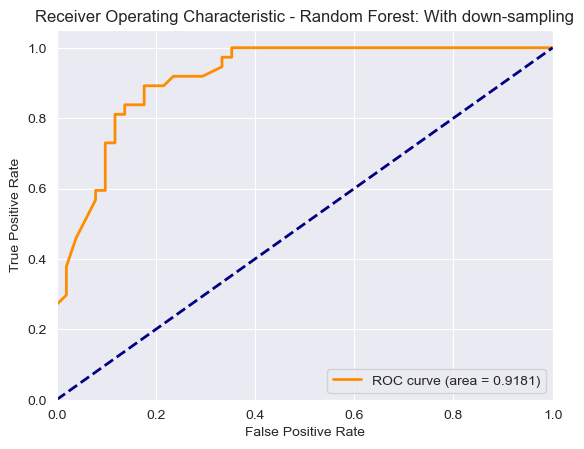

Random Forest: With up-sampling (SMOTE), after data clipping Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.973485 │
├───────────┼──────────┤
│ Precision │ 0.955081 │
├───────────┼──────────┤
│ Recall    │ 0.993109 │
├───────────┼──────────┤
│ F1 score  │ 0.973724 │
├───────────┼──────────┤
│ RMSE      │ 0.162835 │
├───────────┼──────────┤
│ AUC       │ 0.998362 │
╘═══════════╧══════════╛
Confusion Matrix:
[[1273   61]
 [   9 1297]]



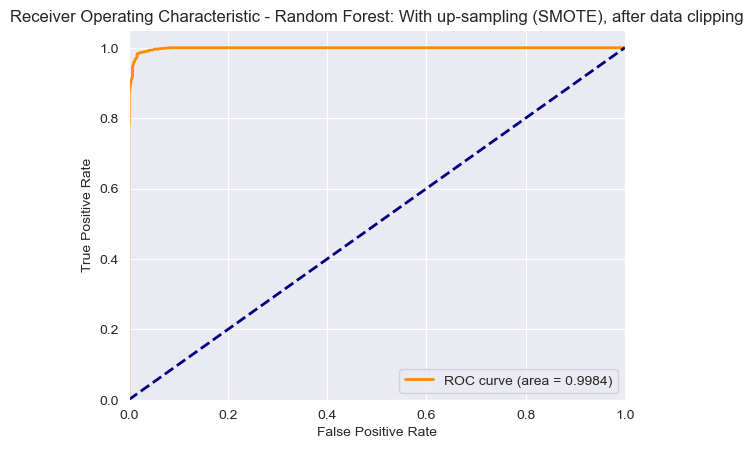

Random Forest: With down-sampling, after data clipping Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.840909 │
├───────────┼──────────┤
│ Precision │ 0.794872 │
├───────────┼──────────┤
│ Recall    │ 0.837838 │
├───────────┼──────────┤
│ F1 score  │ 0.815789 │
├───────────┼──────────┤
│ RMSE      │ 0.398862 │
├───────────┼──────────┤
│ AUC       │ 0.91256  │
╘═══════════╧══════════╛
Confusion Matrix:
[[43  8]
 [ 6 31]]



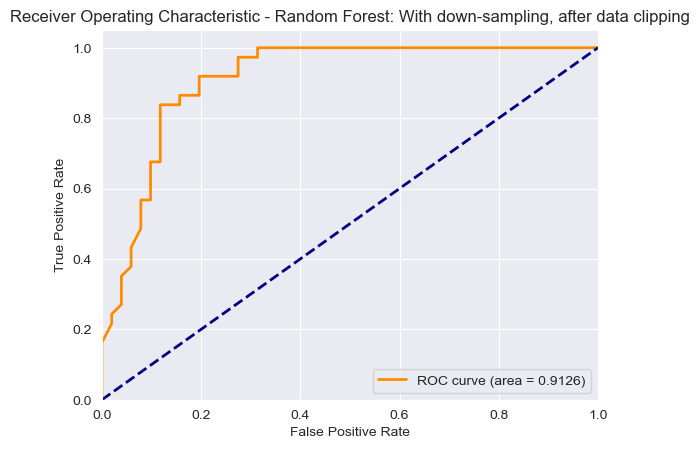

In [205]:
# Evaluate the KNN model
evaluate_model("KNN: Simple", knn_model_1, X_test_1, y_test_1)
evaluate_model("KNN: With up-sampling (SMOTE)", knn_model_2, X_test_2, y_test_2)
evaluate_model("KNN: With down-sampling", knn_model_3, X_test_3, y_test_3)
evaluate_model("KNN: With up-sampling (SMOTE), after data clipping", knn_model_4, X_test_4, y_test_4)
evaluate_model("KNN: With down-sampling, after data clipping", knn_model_3, X_test_3, y_test_3)

# Evaluate the Neural Network model
evaluate_model("Neural Network: Simple", nn_model_1, X_test_1, y_test_1)
evaluate_model("Neural Network: With up-sampling (SMOTE)", nn_model_2, X_test_2, y_test_2)
evaluate_model("Neural Network: With down-sampling", nn_model_3, X_test_3, y_test_3)
evaluate_model("Neural Network: With up-sampling (SMOTE), after data clipping", nn_model_4, X_test_4, y_test_4)
evaluate_model("Neural Network: With down-sampling, after data clipping", nn_model_5, X_test_5, y_test_5)

# Evaluate the Decision Tree model
evaluate_model("Decision Tree: Simple", dt_model_1, X_test_1, y_test_1)
evaluate_model("Decision Tree: With up-sampling (SMOTE)", dt_model_2, X_test_2, y_test_2)
evaluate_model("Decision Tree: With down-sampling", dt_model_3, X_test_3, y_test_3)
evaluate_model("Decision Tree: With up-sampling (SMOTE), after data clipping", dt_model_4, X_test_4, y_test_4)
evaluate_model("Decision Tree: With down-sampling, after data clipping", dt_model_5, X_test_5, y_test_5)

# Evaluate the Naive Bayes model
evaluate_model("Naive Bayes: Simple", nb_model_1, X_test_1, y_test_1)
evaluate_model("Naive Bayes: With up-sampling (SMOTE)", nb_model_2, X_test_2, y_test_2)
evaluate_model("Naive Bayes: With down-sampling", nb_model_3, X_test_3, y_test_3)
evaluate_model("Naive Bayes: With up-sampling (SMOTE), after data clipping", nb_model_4, X_test_4, y_test_4)
evaluate_model("Naive Bayes: With down-sampling, after data clipping", nb_model_5, X_test_5, y_test_5)

# Evaluate the Random Forest model
evaluate_model("Random Forest: Simple", nf_model_1, X_test_1, y_test_1)
evaluate_model("Random Forest: With up-sampling (SMOTE)", nf_model_2, X_test_2, y_test_2)
evaluate_model("Random Forest: With down-sampling", nf_model_3, X_test_3, y_test_3)
evaluate_model("Random Forest: With up-sampling (SMOTE), after data clipping", nf_model_4, X_test_4, y_test_4)
evaluate_model("Random Forest: With down-sampling, after data clipping", nf_model_5, X_test_5, y_test_5)


In [206]:
# Print the table of results
print(results_df)

                                                Model  Accuracy  Precision  \
0                                         KNN: Simple  0.965543   0.700000   
1                       KNN: With up-sampling (SMOTE)  0.772727   0.803787   
2                             KNN: With down-sampling  0.477273   0.390244   
3   KNN: With up-sampling (SMOTE), after data clip...  0.775758   0.780220   
4        KNN: With down-sampling, after data clipping  0.477273   0.390244   
5                              Neural Network: Simple  0.962610   0.500000   
6            Neural Network: With up-sampling (SMOTE)  0.685985   0.620515   
7                  Neural Network: With down-sampling  0.625000   0.571429   
8   Neural Network: With up-sampling (SMOTE), afte...  0.653030   0.691176   
9   Neural Network: With down-sampling, after data...  0.579545   0.500000   
10                              Decision Tree: Simple  0.961144   0.458333   
11            Decision Tree: With up-sampling (SMOTE)  0.923106 

In [207]:
results_df.to_csv("Data/model_comparison_results.csv")